In [ ]:
pip install mysql-connector-python


In [15]:
import mysql.connector
from mysql.connector import Error

# Membuat koneksi ke database MySQL
def create_connection():
    try:
        connection = mysql.connector.connect(
            host='localhost',
            database='PerpustakaanDigital',
            user='root',
            password=''
        )
        if connection.is_connected():
            print("Koneksi ke MySQL berhasil!")
        return connection

    except Error as e:
        print(f"Error saat terhubung ke MySQL: {e}")
        return None

# Fungsi untuk menutup koneksi
def close_connection(connection):
    if connection.is_connected():
        connection.close()
        print("Koneksi ke MySQL ditutup.")

# Fungsi untuk membuat tabel
def create_table(connection):
    try:
        cursor = connection.cursor()
        cursor.execute("""
            CREATE TABLE IF NOT EXISTS Buku (
                ID_Buku INT PRIMARY KEY AUTO_INCREMENT,
                Judul_Buku VARCHAR(255),
                Pengarang VARCHAR(255),
                Tahun_Terbit INT,
                Kategori VARCHAR(255),
                Jumlah INT
            )
        """)
        connection.commit()
        print("Tabel Buku berhasil dibuat.")
    except Error as e:
        print(f"Error saat membuat tabel: {e}")

# Fungsi untuk memasukkan data
def insert_data(connection):
    try:
        cursor = connection.cursor()
        sql_insert = """
            INSERT INTO Buku (Judul_Buku, Pengarang, Tahun_Terbit, Kategori, Jumlah)
            VALUES (%s, %s, %s, %s, %s)
        """
        data = [
            ('Seni Merayu Tuhan', 'Husein Jafar', 2022, 'Non Fiksi', 14),
            ('The Subtle Art of Not Giving a F*ck', 'Mark Manson', 2016, 'Non Fiksi', 24),
            ('The Psychology of Money', 'Morgan Housel', 2020, 'Non Fiksi', 11)
        ]
        cursor.executemany(sql_insert, data)
        connection.commit()
        print(f"{cursor.rowcount} data berhasil dimasukkan.")
    except Error as e:
        print(f"Error saat memasukkan data: {e}")

# Fungsi untuk membaca data berdasarkan kategori
def read_data_by_category(connection, kategori):
    try:
        cursor = connection.cursor()
        sql_select = "SELECT * FROM Buku WHERE Kategori = %s"
        cursor.execute(sql_select, (kategori,))
        rows = cursor.fetchall()
        print(f"Data Buku dalam kategori '{kategori}':")
        for row in rows:
            print(row)
    except Error as e:
        print(f"Error saat membaca data: {e}")

# Fungsi untuk mengupdate jumlah buku
def update_book_quantity(connection, id_buku, jumlah_baru):
    try:
        cursor = connection.cursor()
        sql_update = "UPDATE Buku SET Jumlah = %s WHERE ID_Buku = %s"
        data = (jumlah_baru, id_buku)
        cursor.execute(sql_update, data)
        connection.commit()
        print(f"Jumlah buku ID_Buku {id_buku} berhasil diperbarui.")
    except Error as e:
        print(f"Error saat mengupdate jumlah buku: {e}")

# Fungsi untuk menghapus semua buku dalam kategori tertentu
def delete_books_by_category(connection, kategori):
    try:
        cursor = connection.cursor()
        sql_delete = "DELETE FROM Buku WHERE Kategori = %s"
        cursor.execute(sql_delete, (kategori,))
        connection.commit()
        print(f"Semua buku dalam kategori '{kategori}' berhasil dihapus.")
    except Error as e:
        print(f"Error saat menghapus buku: {e}")

# Main program
if __name__ == "__main__":
    connection = create_connection()

    if connection is not None:
        # Membuat tabel jika belum ada
        create_table(connection)

        # Memasukkan data ke tabel
        insert_data(connection)

        # Membaca data berdasarkan kategori
        read_data_by_category(connection, 'Non Fiksi')

        # Mengupdate jumlah buku
        update_book_quantity(connection, 1, 20)

        # Membaca data setelah update
        read_data_by_category(connection, 'Non Fiksi')

        # Menghapus semua buku dalam kategori 'Non Fiksi'
        delete_books_by_category(connection, 'Non Fiksi')

        # Membaca data setelah penghapusan
        read_data_by_category(connection, 'Non Fiksi')

        # Menutup koneksi
        close_connection(connection)


Koneksi ke MySQL berhasil!
Tabel Buku berhasil dibuat.
3 data berhasil dimasukkan.
Data Buku dalam kategori 'Non Fiksi':
(18, 'Seni Merayu Tuhan', 'Husein Jafar', 2022, 'Non Fiksi', 14)
(19, 'The Subtle Art of Not Giving a F*ck', 'Mark Manson', 2016, 'Non Fiksi', 24)
(20, 'The Psychology of Money', 'Morgan Housel', 2020, 'Non Fiksi', 11)
Jumlah buku ID_Buku 1 berhasil diperbarui.
Data Buku dalam kategori 'Non Fiksi':
(18, 'Seni Merayu Tuhan', 'Husein Jafar', 2022, 'Non Fiksi', 14)
(19, 'The Subtle Art of Not Giving a F*ck', 'Mark Manson', 2016, 'Non Fiksi', 24)
(20, 'The Psychology of Money', 'Morgan Housel', 2020, 'Non Fiksi', 11)
Semua buku dalam kategori 'Non Fiksi' berhasil dihapus.
Data Buku dalam kategori 'Non Fiksi':
Koneksi ke MySQL ditutup.


In [18]:
import mysql.connector
from mysql.connector import Error

# Membuat koneksi ke database MySQL
def create_connection():
    try:
        connection = mysql.connector.connect(
            host='localhost',
            database='PerpustakaanDigital',
            user='root',
            password=''
        )
        if connection.is_connected():
            print("Koneksi ke MySQL berhasil!")
        return connection

    except Error as e:
        print(f"Error saat terhubung ke MySQL: {e}")
        return None

# Fungsi untuk menutup koneksi
def close_connection(connection):
    if connection.is_connected():
        connection.close()
        print("Koneksi ke MySQL ditutup.")

# Fungsi untuk membuat tabel
def create_table(connection):
    try:
        cursor = connection.cursor()
        cursor.execute("""
            CREATE TABLE IF NOT EXISTS Petugas (
                ID_Petugas INT PRIMARY KEY AUTO_INCREMENT,
                Nama_Petugas VARCHAR(255),
                Posisi VARCHAR(255),
                Tanggal_Masuk DATE,
                nohp VARCHAR(20)
            )
        """)
        connection.commit()
        print("Tabel Petugas berhasil dibuat.")
    except Error as e:
        print(f"Error saat membuat tabel: {e}")

# Fungsi untuk memasukkan data
def insert_data(connection):
    try:
        cursor = connection.cursor()
        sql_insert = """
            INSERT INTO Petugas (Nama_Petugas, Posisi, Tanggal_Masuk, nohp)
            VALUES (%s, %s, %s, %s)
        """
        data = [
            ('Mamat', 'Admin', '2022-01-01', '08123456789'),
            ('Budi', 'Kepala Seksi', '2021-06-15', '08234567890'),
            ('Siti', 'Staff', '2020-11-20', '08345678901'),
            ('Dewi', 'Kasir', '2019-05-10', '08456789012'),
            ('Joko', 'Security', '2018-07-25', '08567890123')
        ]
        cursor.executemany(sql_insert, data)
        connection.commit()
        print(f"{cursor.rowcount} data berhasil dimasukkan.")
    except Error as e:
        print(f"Error saat memasukkan data: {e}")


# Fungsi untuk membaca data dari tabel
def read_data(connection):
    try:
        cursor = connection.cursor()
        cursor.execute("SELECT * FROM Petugas")
        rows = cursor.fetchall()
        print("Data dalam tabel Petugas:")
        for row in rows:
            print(row)
    except Error as e:
        print(f"Error saat membaca data: {e}")

# Fungsi untuk mengupdate data
def update_data(connection, id_petugas, nama_petugas):
    try:
        cursor = connection.cursor()
        sql_update = "UPDATE Petugas SET Nama_Petugas = %s WHERE ID_Petugas = %s"
        data = (nama_petugas, id_petugas)
        cursor.execute(sql_update, data)
        connection.commit()
        print(f"Data ID_Petugas{id_petugas} berhasil diperbarui.")
    except Error as e:
        print(f"Error saat mengupdate data: {e}")

# Fungsi untuk menghapus data
def delete_data(connection, id_petugas):
    try:
        cursor = connection.cursor()
        sql_delete = "DELETE FROM Petugas WHERE ID_Petugas = %s"
        cursor.execute(sql_delete, (id_petugas,))
        connection.commit()
        print(f"Data ID_Petugas {id_petugas} berhasil dihapus.")
    except Error as e:
        print(f"Error saat menghapus data: {e}")

# Main program
if __name__ == "__main__":
    connection = create_connection()

    if connection is not None:
        # Membuat tabel jika belum ada
        create_table(connection)

        # Memasukkan data ke tabel
        insert_data(connection)

        # Membaca data dari tabel
        read_data(connection)

        # Mengupdate data buku
        update_data(connection, 1, "Mulyono")

        # Membaca data setelah update
        read_data(connection)

        # Menghapus data buku
        delete_data(connection, 3)

        # Membaca data setelah penghapusan
        read_data(connection)

        # Menutup koneksi
        close_connection(connection)


Koneksi ke MySQL berhasil!
Tabel Petugas berhasil dibuat.
5 data berhasil dimasukkan.
Data dalam tabel Petugas:
(1, 'Mulyono', 'Admin', datetime.date(2022, 1, 1), '081234567890')
(2, 'Rina Wahyuni', 'Librarian', datetime.date(2023, 3, 15), '081298765432')
(4, 'Budi', 'Kepala Seksi', datetime.date(2021, 6, 15), '08234567890')
(5, 'Siti', 'Staff', datetime.date(2020, 11, 20), '08345678901')
(6, 'Dewi', 'Kasir', datetime.date(2019, 5, 10), '08456789012')
(13, 'Mamat', 'Admin', datetime.date(2022, 1, 1), '08123456789')
(14, 'Budi', 'Kepala Seksi', datetime.date(2021, 6, 15), '08234567890')
(15, 'Siti', 'Staff', datetime.date(2020, 11, 20), '08345678901')
(16, 'Dewi', 'Kasir', datetime.date(2019, 5, 10), '08456789012')
(17, 'Joko', 'Security', datetime.date(2018, 7, 25), '08567890123')
(18, 'Mamat', 'Admin', datetime.date(2022, 1, 1), '08123456789')
(19, 'Budi', 'Kepala Seksi', datetime.date(2021, 6, 15), '08234567890')
(20, 'Siti', 'Staff', datetime.date(2020, 11, 20), '08345678901')
(21, 

In [16]:
import mysql.connector
from mysql.connector import Error

# Fungsi untuk membuat tabel
def create_table(connection):
    try:
        cursor = connection.cursor()
        cursor.execute("""
            CREATE TABLE IF NOT EXISTS Anggota (
                ID_Anggota INT PRIMARY KEY AUTO_INCREMENT,
                Nama VARCHAR(255),
                Alamat VARCHAR(255),
                Tanggal_Lahir DATE,
                Email VARCHAR(255)
            )
        """)
        connection.commit()
        print("Tabel Anggota berhasil dibuat.")
    except Error as e:
        print(f"Error saat membuat tabel: {e}")

# Fungsi untuk memasukkan data
def insert_data(connection):
    try:
        cursor = connection.cursor()
        sql_insert = """
            INSERT INTO Anggota (Nama, Alamat, Tanggal_Lahir, Email)
            VALUES (%s, %s, %s, %s)
        """
        data = [
            ('John Doe', 'Jl. Mawar No.1', '1990-01-01', 'john@example.com'),
            ('Jane Doe', 'Jl. Melati No.2', '1995-05-15', 'jane@example.com'),
            ('Ahmad', 'Jl. Kenanga No.3', '1992-03-25', 'ahmad@example.com')
        ]
        cursor.executemany(sql_insert, data)
        connection.commit()
        print(f"{cursor.rowcount} data berhasil dimasukkan.")
    except Error as e:
        print(f"Error saat memasukkan data: {e}")

# Fungsi untuk membaca data dari tabel
def read_data(connection):
    try:
        cursor = connection.cursor()
        cursor.execute("SELECT * FROM Anggota")
        rows = cursor.fetchall()
        print("Data dalam tabel Anggota:")
        for row in rows:
            print(row)
    except Error as e:
        print(f"Error saat membaca data: {e}")

# Fungsi untuk mengupdate data
def update_data(connection, id_anggota, alamat_baru):
    try:
        cursor = connection.cursor()
        sql_update = "UPDATE Anggota SET Alamat = %s WHERE ID_Anggota = %s"
        data = (alamat_baru, id_anggota)
        cursor.execute(sql_update, data)
        connection.commit()
        print(f"Data ID_Anggota {id_anggota} berhasil diperbarui.")
    except Error as e:
        print(f"Error saat mengupdate data: {e}")

# Fungsi untuk menghapus data
def delete_data(connection, id_anggota):
    try:
        cursor = connection.cursor()
        sql_delete = "DELETE FROM Anggota WHERE ID_Anggota = %s"
        cursor.execute(sql_delete, (id_anggota,))
        connection.commit()
        print(f"Data ID_Anggota {id_anggota} berhasil dihapus.")
    except Error as e:
        print(f"Error saat menghapus data: {e}")

# Main program
if __name__ == "__main__":
    connection = create_connection()

    if connection is not None:
        # Membuat tabel jika belum ada
        create_table(connection)

        # Memasukkan data ke tabel
        insert_data(connection)

        # Membaca data dari tabel
        read_data(connection)

        # Mengupdate data anggota
        update_data(connection, 1, "Jl. Anggrek No.5")

        # Membaca data setelah update
        read_data(connection)

        # Menghapus data anggota
        delete_data(connection, 4)

        # Membaca data setelah penghapusan
        read_data(connection)

        # Menutup koneksi
        close_connection(connection)


Koneksi ke MySQL berhasil!
Tabel Anggota berhasil dibuat.
3 data berhasil dimasukkan.
Data dalam tabel Anggota:
(1, 'Ahmad Fauzi', 'Jl. Anggrek No.5', datetime.date(1985, 6, 10), 'ahmad@mail.com')
(2, 'Budi Putra', 'Jl. Melati No. 3', datetime.date(1990, 2, 18), 'budi@mail.com')
(5, 'Eko Saputra', 'Jl. Anggrek No. 9', datetime.date(1987, 3, 25), 'eko@mail.com')
(6, 'John Doe', 'Jl. Mawar No.1', datetime.date(1990, 1, 1), 'john@example.com')
(7, 'Jane Doe', 'Jl. Melati No.2', datetime.date(1995, 5, 15), 'jane@example.com')
(8, 'Ahmad', 'Jl. Kenanga No.3', datetime.date(1992, 3, 25), 'ahmad@example.com')
(9, 'John Doe', 'Jl. Mawar No.1', datetime.date(1990, 1, 1), 'john@example.com')
(10, 'Jane Doe', 'Jl. Melati No.2', datetime.date(1995, 5, 15), 'jane@example.com')
(11, 'Ahmad', 'Jl. Kenanga No.3', datetime.date(1992, 3, 25), 'ahmad@example.com')
(12, 'John Doe', 'Jl. Mawar No.1', datetime.date(1990, 1, 1), 'john@example.com')
(13, 'Jane Doe', 'Jl. Melati No.2', datetime.date(1995, 5, 1

In [2]:
import mysql.connector
from mysql.connector import Error

# Fungsi untuk membuat koneksi ke database MySQL
def create_connection():
    try:
        connection = mysql.connector.connect(
            host='localhost',
            database='rumah_sakit',
            user='root',
            password=''
        )
        if connection.is_connected():
            print("Koneksi ke MySQL berhasil!")
        return connection

    except Error as e:
        print(f"Error saat terhubung ke MySQL: {e}")
        return None

# Fungsi untuk menutup koneksi
def close_connection(connection):
    if connection.is_connected():
        connection.close()
        print("Koneksi ke MySQL ditutup.")

# Fungsi untuk memasukkan data pasien baru
def insert_data(connection):
    try:
        cursor = connection.cursor()
        nama = input("Masukkan nama pasien: ")
        tanggal_lahir = input("Masukkan tanggal lahir pasien (YYYY-MM-DD): ")
        jenis_kelamin = input("Masukkan jenis kelamin pasien (L/P): ")
        alamat = input("Masukkan alamat pasien: ")
        
        sql_insert = """
            INSERT INTO pasien (nama, tanggal_lahir, jenis_kelamin, alamat)
            VALUES (%s, %s, %s, %s)
        """
        data = (nama, tanggal_lahir, jenis_kelamin, alamat)
        cursor.execute(sql_insert, data)
        connection.commit()
        print(f"{cursor.rowcount} data berhasil dimasukkan.")
    except Error as e:
        print(f"Error saat memasukkan data: {e}")

# Fungsi untuk menampilkan data pasien
def show_data(connection):
    try:
        cursor = connection.cursor()
        cursor.execute("SELECT * FROM pasien")
        rows = cursor.fetchall()
        print("Data dalam tabel pasien:")
        for row in rows:
            print(row)
    except Error as e:
        print(f"Error saat membaca data: {e}")

# Fungsi untuk mengupdate data pasien
def update_data(connection):
    try:
        cursor = connection.cursor()
        id_pasien = input("Masukkan ID pasien yang ingin diupdate: ")
        print("Data apa yang ingin Anda update?")
        print("1. Nama")
        print("2. Tanggal Lahir")
        print("3. Jenis Kelamin")
        print("4. Alamat")
        pilihan = input("Masukkan nomor pilihan: ")
        
        if pilihan == '1':
            kolom = "nama"
        elif pilihan == '2':
            kolom = "tanggal_lahir"
        elif pilihan == '3':
            kolom = "jenis_kelamin"
        elif pilihan == '4':
            kolom = "alamat"
        else:
            print("Pilihan tidak valid.")
            return
        
        nilai_baru = input(f"Masukkan nilai baru untuk {kolom}: ")
        sql_update = f"UPDATE pasien SET {kolom} = %s WHERE id_pasien = %s"
        data = (nilai_baru, id_pasien)
        cursor.execute(sql_update, data)
        connection.commit()
        print(f"Data pasien ID {id_pasien} berhasil diperbarui.")
    except Error as e:
        print(f"Error saat mengupdate data: {e}")

# Fungsi untuk menghapus data pasien
def delete_data(connection):
    try:
        cursor = connection.cursor()
        id_pasien = input("Masukkan ID pasien yang ingin dihapus: ")
        sql_delete = "DELETE FROM pasien WHERE id_pasien = %s"
        cursor.execute(sql_delete, (id_pasien,))
        connection.commit()
        print(f"Data pasien ID {id_pasien} berhasil dihapus.")
    except Error as e:
        print(f"Error saat menghapus data: {e}")

# Main program
if __name__ == "__main__":
    connection = create_connection()

    if connection is not None:
        while True:
            print("\nMenu:")
            print("1. Tambah Data Pasien")
            print("2. Update Data Pasien")
            print("3. Hapus Data Pasien")
            print("4. Tampilkan Data Pasien")
            print("5. Keluar")
            pilihan = input("Masukkan nomor pilihan: ")

            if pilihan == '1':
                insert_data(connection)
            elif pilihan == '2':
                update_data(connection)
            elif pilihan == '3':
                delete_data(connection)
            elif pilihan == '4':
                show_data(connection)
            elif pilihan == '5':
                break
            else:
                print("Pilihan tidak valid.")

        # Menutup koneksi ke database
        close_connection(connection)

Koneksi ke MySQL berhasil!

Menu:
1. Tambah Data Pasien
2. Update Data Pasien
3. Hapus Data Pasien
4. Tampilkan Data Pasien
5. Keluar


Masukkan nomor pilihan:  1
Masukkan nama pasien:  Bagas Mulyono
Masukkan tanggal lahir pasien (YYYY-MM-DD):  2003-05-15
Masukkan jenis kelamin pasien (L/P):  L
Masukkan alamat pasien:  Garut


1 data berhasil dimasukkan.

Menu:
1. Tambah Data Pasien
2. Update Data Pasien
3. Hapus Data Pasien
4. Tampilkan Data Pasien
5. Keluar


Masukkan nomor pilihan:  4


Data dalam tabel pasien:
(1, 'Budi Santoso', datetime.date(1985, 4, 12), 'L', 'Jl. Merdeka No. 20')
(6, 'Bagas Mulyono', datetime.date(2003, 5, 15), 'L', 'Garut')

Menu:
1. Tambah Data Pasien
2. Update Data Pasien
3. Hapus Data Pasien
4. Tampilkan Data Pasien
5. Keluar


Masukkan nomor pilihan:  2
Masukkan ID pasien yang ingin diupdate:  6


Data apa yang ingin Anda update?
1. Nama
2. Tanggal Lahir
3. Jenis Kelamin
4. Alamat


Masukkan nomor pilihan:  4
Masukkan nilai baru untuk alamat:  Surabaya


Data pasien ID 6 berhasil diperbarui.

Menu:
1. Tambah Data Pasien
2. Update Data Pasien
3. Hapus Data Pasien
4. Tampilkan Data Pasien
5. Keluar


Masukkan nomor pilihan:  4


Data dalam tabel pasien:
(1, 'Budi Santoso', datetime.date(1985, 4, 12), 'L', 'Jl. Merdeka No. 20')
(6, 'Bagas Mulyono', datetime.date(2003, 5, 15), 'L', 'Surabaya')

Menu:
1. Tambah Data Pasien
2. Update Data Pasien
3. Hapus Data Pasien
4. Tampilkan Data Pasien
5. Keluar


Masukkan nomor pilihan:  3
Masukkan ID pasien yang ingin dihapus:  6


Data pasien ID 6 berhasil dihapus.

Menu:
1. Tambah Data Pasien
2. Update Data Pasien
3. Hapus Data Pasien
4. Tampilkan Data Pasien
5. Keluar


Masukkan nomor pilihan:  4


Data dalam tabel pasien:
(1, 'Budi Santoso', datetime.date(1985, 4, 12), 'L', 'Jl. Merdeka No. 20')

Menu:
1. Tambah Data Pasien
2. Update Data Pasien
3. Hapus Data Pasien
4. Tampilkan Data Pasien
5. Keluar


Masukkan nomor pilihan:  4


Data dalam tabel pasien:
(1, 'Budi Santoso', datetime.date(1985, 4, 12), 'L', 'Jl. Merdeka No. 20')

Menu:
1. Tambah Data Pasien
2. Update Data Pasien
3. Hapus Data Pasien
4. Tampilkan Data Pasien
5. Keluar


Masukkan nomor pilihan:  5


In [3]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


[*********************100%***********************]  1 of 1 completed


                              Open     High      Low    Close  Adj Close  \
Datetime                                                                   
2024-09-16 02:00:00+01:00  15400.0  15400.0  15394.0  15394.0    15394.0   
2024-09-16 04:00:00+01:00  15395.0  15395.0  15395.0  15395.0    15395.0   
2024-09-16 05:00:00+01:00  15395.0  15395.0  15395.0  15395.0    15395.0   
2024-09-16 06:00:00+01:00  15395.0  15395.0  15395.0  15395.0    15395.0   
2024-09-16 07:00:00+01:00  15395.0  15395.0  15395.0  15395.0    15395.0   
...                            ...      ...      ...      ...        ...   
2024-09-20 13:00:00+01:00  15095.0  15095.0  15095.0  15095.0    15095.0   
2024-09-20 15:00:00+01:00  15095.0  15144.0  15095.0  15144.0    15144.0   
2024-09-20 17:00:00+01:00  15095.0  15144.0  15095.0  15144.0    15144.0   
2024-09-20 19:00:00+01:00  15144.0  15144.0  15144.0  15144.0    15144.0   
2024-09-20 23:00:00+01:00  15095.0  15144.0  15095.0  15144.0    15144.0   

           

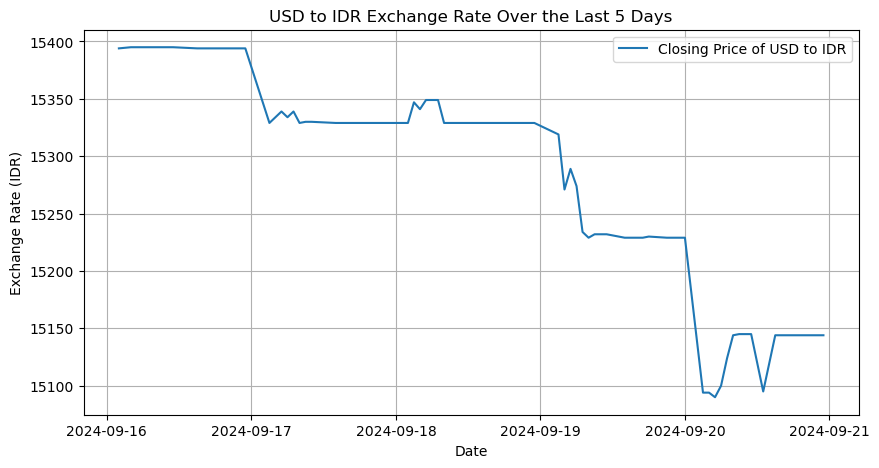

In [9]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Downloading USD to IDR data for the last 5 days
data = yf.download('USDIDR=X', period='5d', interval='1h')

# Checking if the data is not empty
if not data.empty:
    # Display the data
    print(data)

    # Plotting the closing price
    plt.figure(figsize=(10, 5))
    plt.plot(data['Close'], label='Closing Price of USD to IDR')
    plt.title('USD to IDR Exchange Rate Over the Last 5 Days')
    plt.xlabel('Date')
    plt.ylabel('Exchange Rate (IDR)')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Data is not available.")


In [4]:
pip install requests beautifulsoup4 pandas


In [10]:
pip install forex-python


   ---------------------------------------- 0.0/75.6 kB ? eta -:--:--
   ------------------------------------- -- 71.7/75.6 kB 4.1 MB/s eta 0:00:01
   ---------------------------------------- 75.6/75.6 kB 1.1 MB/s eta 0:00:00


In [6]:
import requests
import matplotlib.pyplot as plt
import pandas as pd

# Ganti dengan API key yang kamu dapatkan
API_KEY = 'd634c55f63b3ff2543b78f44'
url = f'https://v6.exchangerate-api.com/v6/{API_KEY}/latest/USD'

# Mendapatkan data nilai tukar dari API
response = requests.get(url)
data = response.json()

# Memeriksa status dan mengambil data jika tersedia
if data['result'] == 'success':
    rates = data['conversion_rates']
    
    # Mengambil nilai tukar USD ke IDR
    usd_to_idr = rates.get('IDR', None)

    if usd_to_idr is not None:
        print(f"Nilai tukar USD ke IDR: {usd_to_idr}")
    else:
        print("IDR tidak ditemukan dalam data.")
else:
    print("Data tidak tersedia:", data['error-type'])


Nilai tukar USD ke IDR: 15152.2138


Exchange rate USD to IDR from API: 15152.2138


[*********************100%***********************]  1 of 1 completed


                              Open     High      Low    Close  Adj Close  \
Datetime                                                                   
2024-08-21 00:00:00+01:00  15475.0  15475.0  15429.0  15429.0    15429.0   
2024-08-21 03:00:00+01:00  15424.0  15475.0  15418.0  15429.0    15429.0   
2024-08-21 04:00:00+01:00  15424.0  15475.0  15424.0  15434.0    15434.0   
2024-08-21 05:00:00+01:00  15433.0  15462.0  15429.0  15460.0    15460.0   
2024-08-21 06:00:00+01:00  15449.0  15460.0  15449.0  15455.0    15455.0   
...                            ...      ...      ...      ...        ...   
2024-09-20 13:00:00+01:00  15095.0  15095.0  15095.0  15095.0    15095.0   
2024-09-20 15:00:00+01:00  15095.0  15144.0  15095.0  15144.0    15144.0   
2024-09-20 17:00:00+01:00  15095.0  15144.0  15095.0  15144.0    15144.0   
2024-09-20 19:00:00+01:00  15144.0  15144.0  15144.0  15144.0    15144.0   
2024-09-20 23:00:00+01:00  15095.0  15144.0  15095.0  15144.0    15144.0   

           

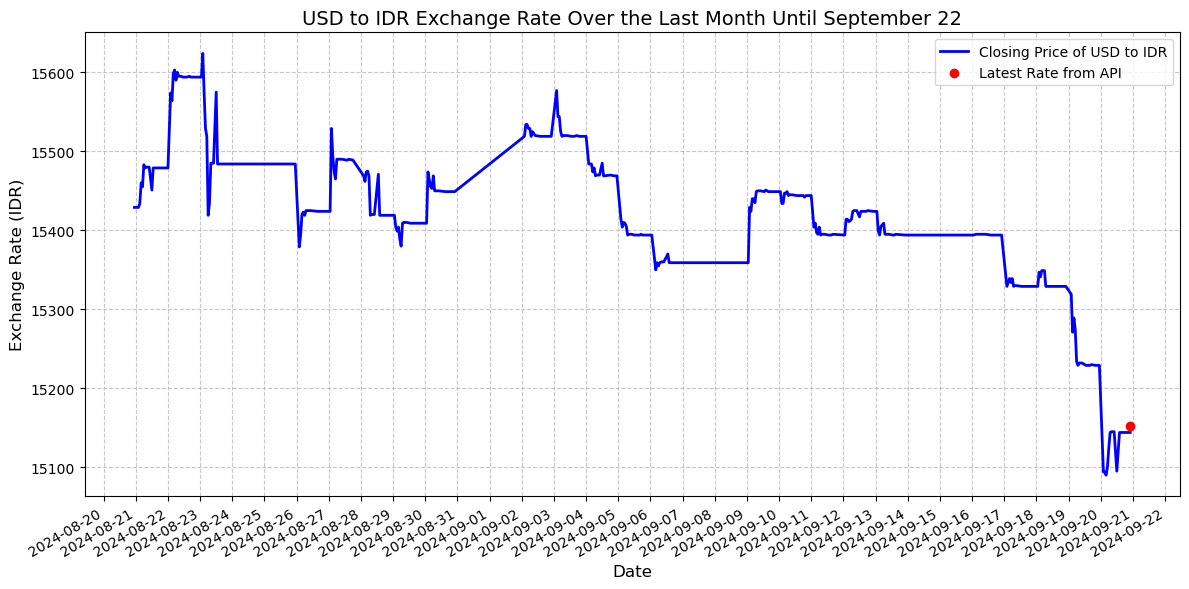

In [32]:
import requests
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Fetching data from ExchangeRate-API
API_KEY = 'd634c55f63b3ff2543b78f44'
url = f'https://v6.exchangerate-api.com/v6/{API_KEY}/latest/USD'

try:
    response = requests.get(url)
    response.raise_for_status()  # Raise an error for bad responses
    data_api = response.json()

    if data_api.get('result') == 'success':
        rates_api = data_api.get('conversion_rates', {})
        usd_to_idr_api = rates_api.get('IDR')
        
        if usd_to_idr_api is not None:
            print(f"Exchange rate USD to IDR from API: {usd_to_idr_api}")
        else:
            print("IDR not found in API data.")
    else:
        print("Data not available from API:", data_api.get('error-type'))

except requests.exceptions.RequestException as e:
    print("Error accessing API:", e)
except ValueError as e:
    print("Error decoding JSON:", e)

# Fetching data from yfinance for the last month
data_yf = yf.download('USDIDR=X', period='1mo', interval='1h')

# Checking if the data is not empty
if not data_yf.empty:
    # Displaying data
    print(data_yf)

    # Filtering data until September 22
    data_yf = data_yf[data_yf.index <= '2024-09-22']

    # Plotting the data from yfinance
    plt.figure(figsize=(12, 6))
    plt.plot(data_yf.index, data_yf['Close'], label='Closing Price of USD to IDR', color='blue', linewidth=2)
    
    # Adding the latest point from API if desired
    plt.scatter([data_yf.index[-1]], [usd_to_idr_api], color='red', label='Latest Rate from API', zorder=5)

    # Formatting the date on the x-axis
    plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.DayLocator())
    plt.gcf().autofmt_xdate()  # Rotate dates for better readability

    plt.title('USD to IDR Exchange Rate Over the Last Month Until September 22', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Exchange Rate (IDR)', fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()  # Adjust layout to prevent clipping
    plt.show()
else:
    print("Data not available from yfinance.")


In [3]:
import pandas as pd
import mysql.connector

# Koneksi ke database
connection = mysql.connector.connect(
    host='localhost',
    user='root',  
    password='',  
    database='hospital_db'
)

# Query untuk mengambil data tidak ternormalisasi
query = """
SELECT 
    p.Id AS Patient_Id,
    p.First AS Patient_First,
    p.Middle AS Patient_Middle,
    p.Last AS Patient_Last,
    p.birth_date AS Patient_BirthDate, 
    p.Gender AS Patient_Gender,
    e.Id AS Encounter_Id,
    e.Start AS Encounter_Start,
    e.Stop AS Encounter_Stop,
    e.encounter_class AS Encounter_Class,
    o.Name AS Organization_Name,
    py.Name AS Payer_Name,
    pr.Code AS Procedure_Code,
    pr.Description AS Procedure_Description
FROM 
    patients p
LEFT JOIN 
    encounters e ON p.Id = e.patient_id
LEFT JOIN 
    organizations o ON e.organization_id = o.Id
LEFT JOIN 
    payers py ON e.payer_id = py.Id
LEFT JOIN 
    procedures pr ON e.id = pr.encounter_id;
"""

# Mengambil data ke dalam DataFrame
data_df = pd.read_sql(query, connection)

# Menutup koneksi
connection.close()

# Menyimpan data ke file Excel
data_df.to_excel('hospital.xlsx', index=False)

print("Data berhasil diekspor ke hospital.xlsx")


C:\Users\Risma\AppData\Local\Temp\ipykernel_14196\3715980242.py:42: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_df = pd.read_sql(query, connection)


Data berhasil diekspor ke hospital.xlsx
